In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Polybench Experimental Results

This notebook puts together how we run Polybench experiments using the `pb-flow` script, and how we process the run results to get the formatted table.

## Setup

We need to put the `python/` directory into the `PYTHONPATH`. 

In [11]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))

In [12]:
from pyphism.polybench import pb_flow

In [13]:
len(pb_flow.discover_examples('./example/polybench'))

30

In [14]:
options = {
  "baseline": pb_flow.PbFlowOptions(
    pb_dir=os.path.join(pb_flow.get_project_root(), 'example', 'polybench'),
    work_dir=os.path.join(pb_flow.get_project_root(), 'tmp', 'phism', 'pb-flow.baseline'),
    job=30,
    polymer=False,
    cosim=True,
    debug=True,
    dataset='MINI',
    cleanup=False,
    loop_transforms=False,
    improve_pipelining=False,
  ),
  "polymer": pb_flow.PbFlowOptions(
    pb_dir=os.path.join(pb_flow.get_project_root(), 'example', 'polybench'),
    work_dir=os.path.join(pb_flow.get_project_root(), 'tmp', 'phism', 'pb-flow.polymer'),
    job=30,
    polymer=True,
    cosim=True,
    debug=True,
    dataset='MINI',
    cleanup=False,
    loop_transforms=True,
  ),
}

## Run `pb-flow`

In [ ]:
pb_flow.pb_flow_runner(options["baseline"])

>>> Starting 30 jobs (work_dir=/mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.baseline) ...
>>> Finished nussinov        elapsed: 128.511995 secs   Status: 0  Error: "No Error"
>>> Finished trmm            elapsed: 145.619500 secs   Status: 1  Error: "Phism syn failed."
>>> Finished floyd-warshall  elapsed: 156.708444 secs   Status: 0  Error: "No Error"
>>> gemver Attempting to fix cosim issues by CosimFixStrategy(phism_directives=[], tbgen_directives=['set_directive_interface kernel_gemver A -mode ap_memory -storage_type ram_1p']) ...
>>> Finished jacobi-1d       elapsed: 232.765012 secs   Status: 0  Error: "No Error"
>>> syrk Attempting to fix cosim issues by CosimFixStrategy(phism_directives=[], tbgen_directives=['set_directive_interface kernel_syrk C -mode ap_memory -storage_type ram_1p']) ...
>>> Finished bicg            elapsed: 240.986459 secs   Status: 0  Error: "No Error"
>>> Finished atax            elapsed: 243.070124 secs   Status: 0  Error: "No Error"
>>> Finished

In [21]:
pb_flow.pb_flow_runner(options["polymer"])

>>> Starting 30 jobs (work_dir=/mnt/ccnas2/bdp/rz3515/projects/phism/tmp/phism/pb-flow.polymer) ...
>>> Finished floyd-warshall  elapsed: 39.559309 secs   Status: 0  Error: "No Error"
>>> Finished nussinov        elapsed: 44.756557 secs   Status: 0  Error: "No Error"
>>> Finished doitgen         elapsed: 88.874694 secs   Status: 0  Error: "No Error"
>>> Finished atax            elapsed: 90.440884 secs   Status: 0  Error: "No Error"
>>> Finished bicg            elapsed: 91.211376 secs   Status: 0  Error: "No Error"
>>> Finished mvt             elapsed: 91.336113 secs   Status: 0  Error: "No Error"
>>> Finished trmm            elapsed: 92.605350 secs   Status: 0  Error: "No Error"
>>> Finished jacobi-1d       elapsed: 95.781324 secs   Status: 0  Error: "No Error"
>>> Finished gesummv         elapsed: 97.492376 secs   Status: 0  Error: "No Error"
>>> Finished durbin          elapsed: 99.081752 secs   Status: 0  Error: "No Error"
>>> Finished trisolv         elapsed: 99.233721 secs   Statu

## Results

Here we list all the results as a table.

In [17]:
baseline = pb_flow.to_pandas(pb_flow.process_pb_flow_result_dir(options['baseline'].work_dir, options['baseline']))
baseline

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,2mm,SUCCESS,6830,50,9999,6720,0,0,4272,850560,425280,2160,80
1,3mm,SUCCESS,11113,30,6792,6466,0,0,4272,850560,425280,2160,80
2,adi,SUCCESS,51181,53,18421,13623,0,0,4272,850560,425280,2160,80
3,atax,SUCCESS,1928,595,52231,43267,0,0,4272,850560,425280,2160,80
4,bicg,SUCCESS,2596,39,13630,6473,0,0,4272,850560,425280,2160,80
5,cholesky,SUCCESS,137534,14,1614,2279,0,0,4272,850560,425280,2160,80
6,correlation,SUCCESS,12927,34,12033,10260,0,0,4272,850560,425280,2160,80
7,covariance,SUCCESS,13455,28,10179,6731,0,0,4272,850560,425280,2160,80
8,deriche,SUCCESS,None,None,None,None,None,None,None,None,None,None,None
9,doitgen,SUCCESS,12561,28,5011,3664,0,0,4272,850560,425280,2160,80


In [22]:
polymer = pb_flow.to_pandas(pb_flow.process_pb_flow_result_dir(options['polymer'].work_dir, options['polymer']))
polymer

,name,status,latency,DSP_usage,FF_usage,LUT_usage,BRAM_18K_usage,URAM_usage,DSP_avail,FF_avail,LUT_avail,BRAM_18K_avail,URAM_avail
0,2mm,SUCCESS,17767,15,7197,4980,0,0,4272,850560,425280,2160,80
1,3mm,SUCCESS,34780,23,9610,8214,0,0,4272,850560,425280,2160,80
2,adi,SUCCESS,85319,81,10291,9757,0,0,4272,850560,425280,2160,80
3,atax,SUCCESS,9261,38,3376,3988,0,0,4272,850560,425280,2160,80
4,bicg,SUCCESS,9381,38,3376,3978,0,0,4272,850560,425280,2160,80
5,cholesky,SUCCESS,103407,18,4776,6930,0,0,4272,850560,425280,2160,80
6,correlation,SUCCESS,76696,17,4440,4899,0,0,4272,850560,425280,2160,80
7,covariance,SUCCESS,82141,14,3098,3163,0,0,4272,850560,425280,2160,80
8,deriche,SUCCESS,237719,23,4373,4787,0,0,4272,850560,425280,2160,80
9,doitgen,SUCCESS,14962,14,2333,2060,0,0,4272,850560,425280,2160,80


In [28]:
from collections import defaultdict

base_succ = pb_flow.filter_success(baseline)
poly_succ = pb_flow.filter_success(polymer)

names = sorted(list(set(base_succ['name']) & set(poly_succ['name'])))

data = defaultdict(list)

for name in names:
  data['name'].append(name)

  data['base_lat'].append(base_succ[base_succ['name'] == name]['latency'].values[0])
  data['poly_lat'].append(poly_succ[poly_succ['name'] == name]['latency'].values[0])

df = pd.DataFrame(data)
df = df.dropna()
df['speedup'] = (df['base_lat'] / df['poly_lat'])
df['poly_lat'] = [int(val) for val in df['poly_lat'].values]
df['base_lat'] = [int(val) for val in df['base_lat'].values]
df

,name,base_lat,poly_lat,speedup
0,2mm,6830,17767,0.384421
1,3mm,11113,34780,0.319523
2,adi,51181,85319,0.599878
3,atax,1928,9261,0.208185
4,bicg,2596,9381,0.276730
5,cholesky,137534,103407,1.330026
6,correlation,12927,76696,0.168549
7,covariance,13455,82141,0.163804
9,doitgen,12561,14962,0.839527
10,durbin,4916,7745,0.634732


In [29]:
df['speedup'].mean()

0.9027811862140639

Text(0, 0.5, 'latency')

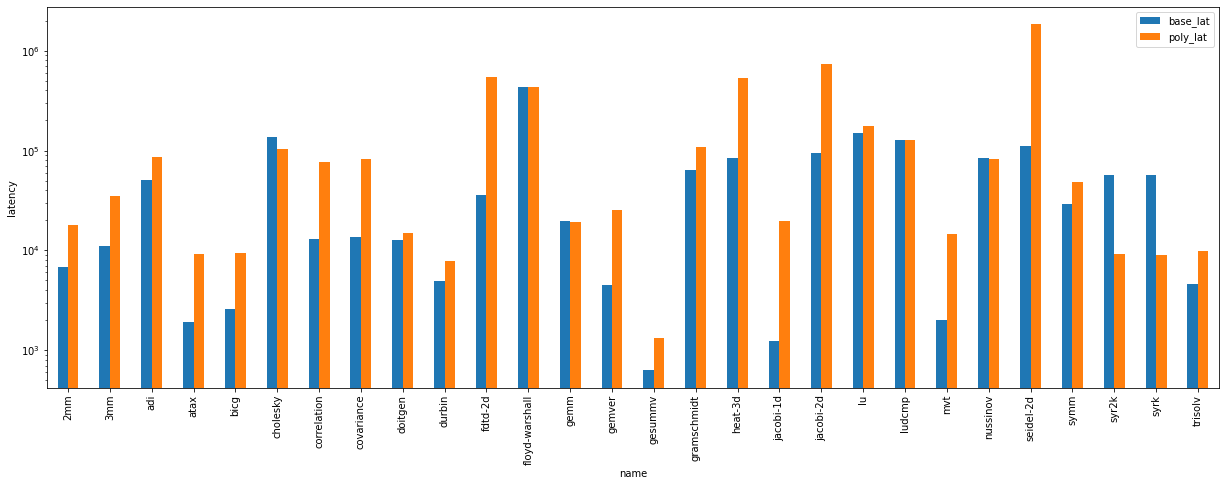

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(21, 7))

df.plot(x='name', y=['base_lat', 'poly_lat'], kind='bar', ax=ax)
ax.set_yscale('log')
ax.set_ylabel('latency')